# spleeter 과정 제외한 음원 장르 분석 모델

In [2]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Librosa for 음원 분석
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

general = "/content/drive"
audio_path = general + "/Othercomputers/MacBookAir/사운드"
output_path = general + "/MyDrive/audio_output"

In [4]:
def song_names(audio_path):
    files = list(os.listdir(f'{audio_path}'))

    songs = []
    paths = []

    for file in files:
        song = f'{file}'
        path = f'{audio_path}/{file}'
        songs.append(song)
        paths.append(path)

    return songs, paths

In [5]:
songs, paths = song_names(audio_path)

In [6]:
print(songs)

['donttrustthedawn_sound.wav', 'goodbye_sound.wav', 'goodmorning_sound.wav', 'timelapse_sound.wav', 'wildflower_sound.wav']


In [7]:
paths

['/content/drive/Othercomputers/MacBookAir/사운드/donttrustthedawn_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/goodbye_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/goodmorning_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/timelapse_sound.wav',
 '/content/drive/Othercomputers/MacBookAir/사운드/wildflower_sound.wav']

## paths를 사용해서 음원별 특징 추출하기

In [8]:
#song_path = {}

#for i, path in enumerate(paths):
#    song_path[i] = path

### librosa 활용

In [9]:
y, sr = librosa.load(paths[0], duration = 60)
audio_file, _ = librosa.effects.trim(y)

In [10]:
s_duration = 1 / sr
print(f"Duration of 1 sample is: {s_duration:.6f} seconds")

Duration of 1 sample is: 0.000045 seconds


In [11]:
duration = librosa.get_duration(audio_file, sr)     # s_duration * len(audio_file) 와 동일; 음원 전체 시간
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 59.61 seconds


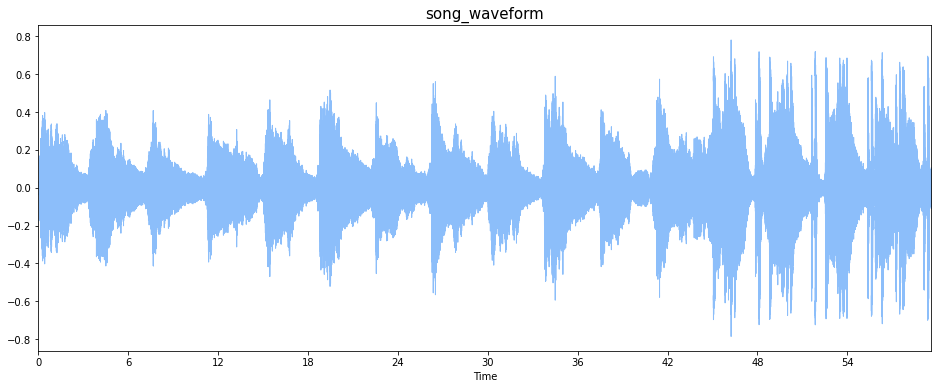

In [12]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#8cbefa");
plt.title("song_waveform", fontsize = 15);

In [13]:
n_fft = 2048 # FFT window size
hop_length = 512

stft = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

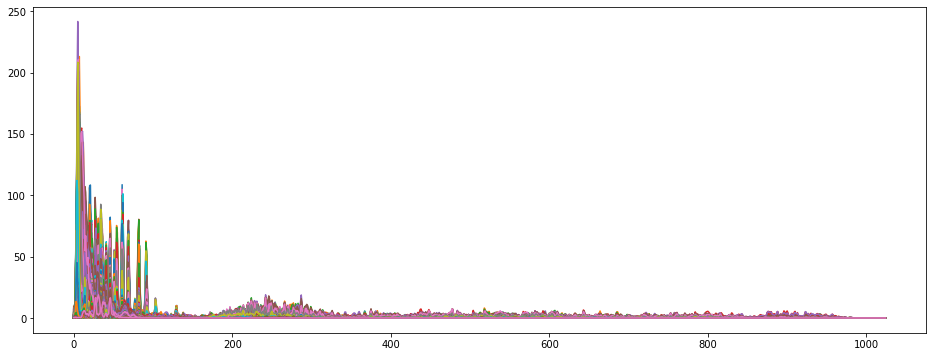

In [14]:
plt.figure(figsize=(16,6))
plt.plot(stft);

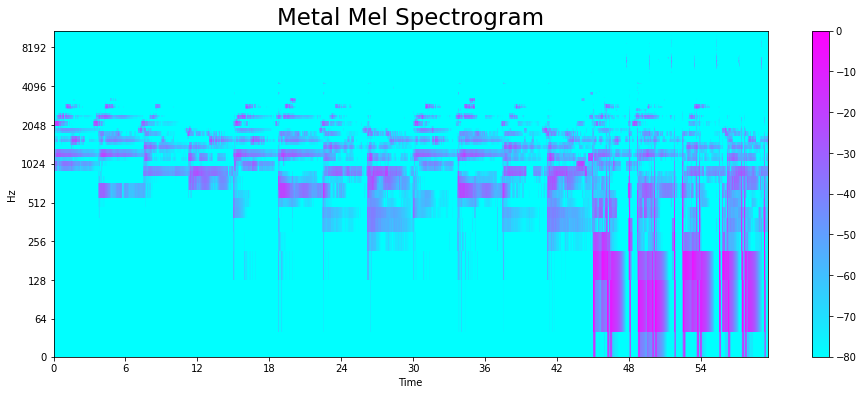

In [16]:
y, sr = librosa.load(paths[0], duration = 60)
audio_file, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(audio_file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log', 
                         cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

In [17]:
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))  # ??

49688


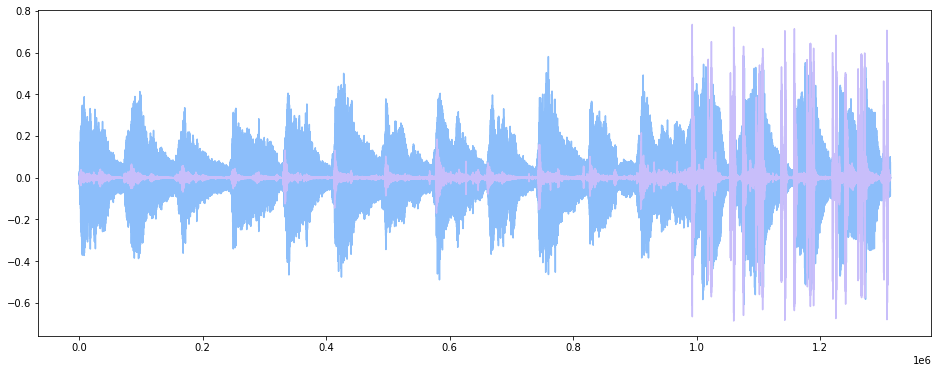

In [22]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#8cbefa'); # 연하늘 - 고조파 (인간의 귀가 들을 수 없는 영역)
plt.plot(y_perc, color = '#c8befa'); # 연보라

In [25]:
y_all, sr = librosa.load(paths[0])
tempo, _ = librosa.beat.beat_track(y_all, sr = sr)
tempo

129.19921875

Centroids: [621.9759685  598.32934101 572.36647423 ... 477.04271216 456.58407589
 469.92807784] 

Shape of Spectral Centroids: (2567,) 

frames: range(0, 2567) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 5.95359637e+01
 5.95591837e+01 5.95824036e+01]


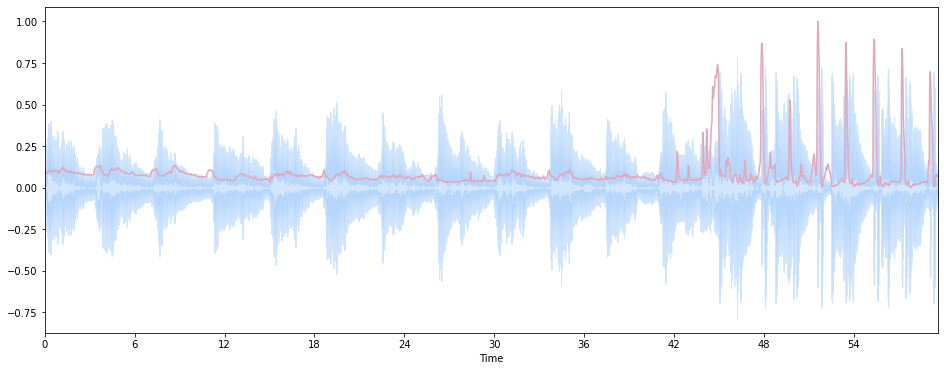

In [26]:
# Calculate the Spectral Centroids # 소리의 질량 중심 계산
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#8cbefa');
plt.plot(t, normalize(spectral_centroids), color='#dfa9be');

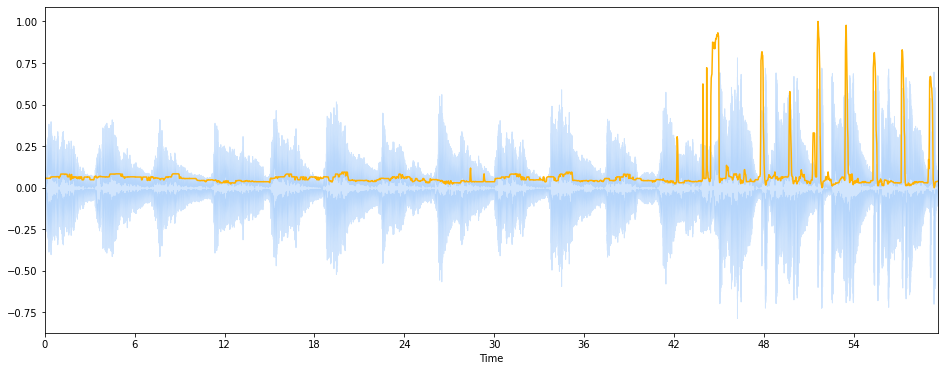

In [27]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#8cbefa');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

In [28]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
#plt.figure(figsize = (16, 6))
#librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

mfccs shape: (20, 2567)


In [48]:
mfccs_mean = []
mfccs_var = []
for mfcc in mfccs:
    mfcc_mean = mfcc.mean()
    mfcc_var = mfcc.var()
    mfccs_mean.append(mfcc_mean)
    mfccs_var.append(mfcc_var)

In [53]:
len(mfccs_mean), len(mfccs_var)

(20, 20)

Mean: -2.6748948e-09 

Var: 1.0000001


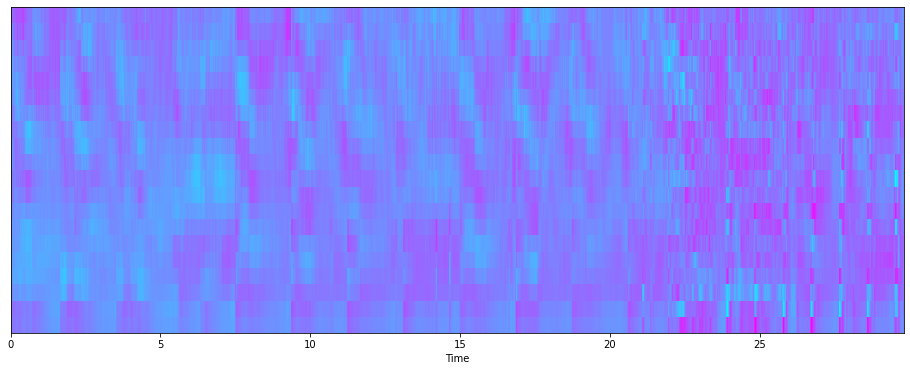

In [55]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

In [59]:
mfcc_all = {}

for i, mfcc in enumerate(mfccs):
    mfcc_all[i] = mfcc

In [60]:
mfcc_all

{0: array([-1.4179072 , -0.438621  ,  0.0583859 , ..., -0.8659237 ,
        -0.89048547, -0.08577485], dtype=float32),
 1: array([-1.6872237 , -0.31639117,  0.27557617, ..., -0.6250712 ,
        -0.6571643 ,  0.31924698], dtype=float32),
 2: array([-0.8545108 , -0.52442586, -0.6868338 , ...,  0.7544971 ,
         0.6798456 ,  0.35226405], dtype=float32),
 3: array([ 0.04097522, -0.8005646 , -1.3427052 , ...,  1.2812718 ,
         1.202806  ,  0.00298923], dtype=float32),
 4: array([ 0.46884683, -0.68442667, -1.077266  , ...,  1.5621054 ,
         1.478559  ,  0.33313322], dtype=float32),
 5: array([ 0.62321705, -0.04240339, -0.21260655, ...,  1.3846464 ,
         1.2293644 ,  0.90124017], dtype=float32),
 6: array([0.4110822 , 0.474538  , 0.17407334, ..., 0.46369174, 0.33665323,
        0.7176917 ], dtype=float32),
 7: array([-0.15123807,  0.05913469, -0.2493693 , ..., -0.511794  ,
        -0.6173856 , -0.20678003], dtype=float32),
 8: array([-0.3306222 , -0.22804815, -0.31424603, ...,

Chromagram shape: (12, 263)


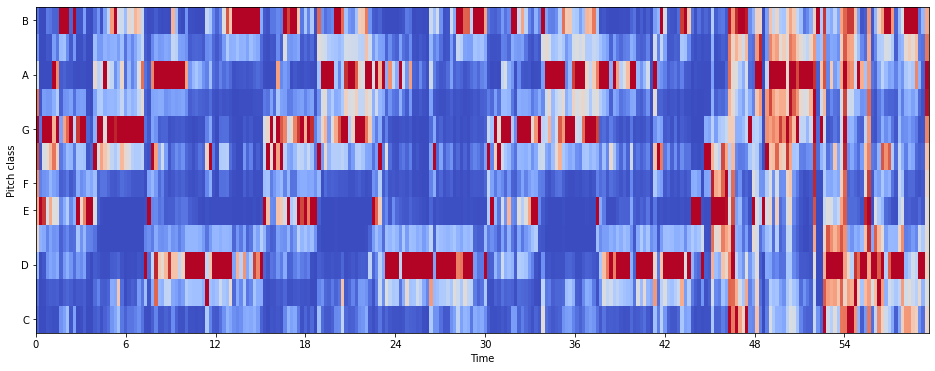

In [40]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromagram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

In [ ]:
# 위 코드들에서 각 피쳐 추출에 필요한 코드만 뽑아서 정리하기
# 함수화 하기

In [ ]:
import os

general = "/content/drive"
audio_path = general + "/Othercomputers/MacBookAir/사운드"
output_path = general + "/MyDrive/audio_output"     # 이미지 저장용 ?

In [32]:
# filename 함수 -> songs 가 노래제목들의 리스트
def song_names(audio_path):                      # audio_path : 음원 파일들의 폴더 경로
    files = list(os.listdir(f'{audio_path}'))

    songs = []
    paths = []

    for file in files:
        song = f'{file}'
        path = f'{audio_path}/{file}'
        songs.append(song)
        paths.append(path)

    return songs, paths

In [33]:
# 음원 업로드 using Librosa
# length 함수 = len(audio_file) 
def soundwave(paths):
    audio_files = []

    for path in paths:
        y, sr = librosa.load(path)
        y, _ = librosa.effects.trim(y)
        audio_files.append(y)

    return audio_files, sr                      # sr 디폴트 : 22050 / 변경 가능한 sr 수치 : 44100

In [54]:
from librosa.feature.spectral import chroma_cens
# chroma_stft_mean, chroma_stft_var 함수 / chromagram.mean(), chromagram.var()
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
def chromagram(audio_file, sr, hop_length):
    chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)

    return chromagram

In [ ]:
# rms_mean, rms_var 함수

def rms(audio_file, frame_length, hop_length):
    rms = librosa.feature.rms(audio_file)

    return rms

In [ ]:
# spectral_centroid_mean, spectral_centroid_var 함수

def spectral_centroid(audio_file, sr):
    centroid = librosa.feature.spectral_centroid(audio_file, sr=sr)

    return centroid

In [ ]:
# spectral_bandwidth_mean, spectral_bandwidth_var 함수

def bandwidth(audio_file, sr):
    bandwidth = librosa.feature.spectral_bandwidth(audio_file, sr=sr)

    return bandwidth

In [ ]:
# rolloff_mean, rolloff_var 함수

def rolloff(audio_file, sr):
    rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)

    return rolloff

In [ ]:
# zero_crossing_rate_mean, zero_crossing_rate_var 함수

def zcr(audio_file):
    zcr = librosa.feature.zero_crossing_rate(audio_file)

    return zcr

In [ ]:
# harmony_mean, harmony_var 함수 / y_harm.mean(), y_harm.var()
# perceptr_mean, perceptr_var / y_perc.mean(), y_perc.var()

def harm_perc(audio_file):
    harm, perc = librosa.effects.hpss(audio_file)

    return harm, perc

In [ ]:
# tempo 함수

def tempo(audio_file, sr):
    tempo, _ = librosa.beat.beat_track(audio_file, sr = sr)

    return tempo

In [ ]:
# mfcc 1 ~ 20 # n_fft 가 디폴트 20인듯 -> 이것을 하나씩 추출

def mfcc(audio_file, sr):
    mfccs = librosa.feature.mfcc(audio_file, sr=sr)
    mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

    mfcc_all = {}

    for i, mfcc in enumerate(mfccs):
        mfcc_all[i] = mfcc

    return mfcc_all

In [ ]:
# 함수들 다 엮어서 df 만들기

#FRAME_LENGTH = 1024
#hop_length = 512
#chr_hop = 5000

#for audio in audio_files:
#   chroma = chromagram(audio, sr, chr_hop)